<a href="https://colab.research.google.com/github/sekhrianchal6/Arima/blob/main/Muhsin_diff_algorthms_scores_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sekhrianchal6/Arima/main/Maternal%20Health%20Risk%20Data%20Set.csv')

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.shape

(1014, 7)

In [ ]:
df['RiskLevel'].replace({"high risk": "3", "mid risk": "2", "low risk" : "1"}, inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


In [ ]:
#df with duplicates
dfwd = df.copy()

In [ ]:
#df of only duplicates
dfd = df.loc[df.duplicated(),:]


In [ ]:
# df without duplicates
dfwnd = df.drop_duplicates()

In [ ]:
print(f"data with duplicates: {len(dfwd)}\ndata without duplicates: {len(dfwnd)}\ndata of only duplicates entries: {len(dfd)}")

data with duplicates: 1014
data without duplicates: 452
data of only duplicates entries: 562


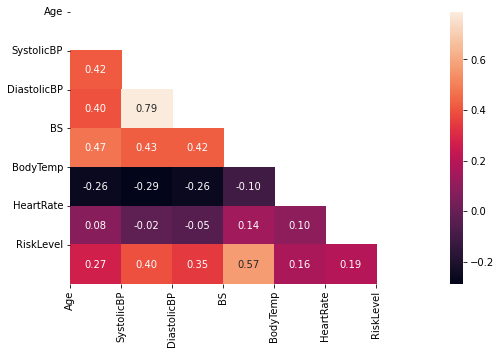

In [ ]:
corr = df.corr()
#mask the repeated  values
mask = np.zeros_like(corr,dtype=bool);
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 5));
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,);
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns);
    #show plot
plt.show()

[0.02017463 0.05252498 0.03014525 0.08920171 0.01796828 0.0133808
 0.77660434]


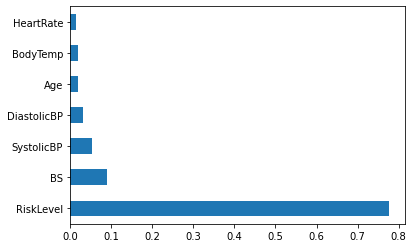

In [ ]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Different Models Base Accuracy Score

In [ ]:
from sklearn.model_selection import train_test_split
X_values = df.drop('RiskLevel', axis=1)
y_values = df['RiskLevel']
X_train,X_test,y_train,y_test = train_test_split(X_values,y_values,
                                                 test_size=0.25,random_state= 42)
X_train.shape,X_test.shape

((760, 6), (254, 6))

In [ ]:
clf = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.RandomForestClassifier(),
    #linear_model.Perceptron(),
    naive_bayes.GaussianNB(),
    CalibratedClassifierCV(svm.LinearSVC()), # SVC does not have predict_proba, and is wrapped into CalibratedClassifierCV
    tree.DecisionTreeClassifier(),
    XGBClassifier(),
    linear_model.LogisticRegression(),
    KNeighborsClassifier()
    ]

In [27]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

print(confusion_matrix(y, y_pred))

[[406   0   0]
 [  0 336   0]
 [  0   0 272]]


In [29]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = xgb_model
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.3031 degrees.
Accuracy = 80.71%.


In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [36]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = clf
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.3858 degrees.
Accuracy = 74.61%.


In [42]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf_1 = BaggingClassifier(
                        n_estimators=10, random_state=0).fit(X, y)
y_pred = clf_1.predict(X)

In [43]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = clf_1
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.2323 degrees.
Accuracy = 82.22%.


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
clf_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train, y_train)
clf_2.fit(X_test, y_test)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [46]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = clf_2
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.3110 degrees.
Accuracy = 78.94%.


In [64]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X, y)
KNeighborsClassifier(...)


KNeighborsClassifier(n_neighbors=Ellipsis)

In [65]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = neigh
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.4488 degrees.
Accuracy = 74.41%.


In [70]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [71]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = regressor
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.2267 degrees.
Accuracy = 82.94%.


In [72]:
from sklearn.naive_bayes import GaussianNB
clf_3 = GaussianNB()
clf_3.fit(X, y)

GaussianNB()

In [73]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = clf_3
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.4882 degrees.
Accuracy = 75.79%.


In [76]:
 from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_clf, cv=3)
calibrated_clf.fit(X, y)

CalibratedClassifierCV(base_estimator=GaussianNB(), cv=3)

In [77]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = calibrated_clf
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.4213 degrees.
Accuracy = 77.10%.
